### Author: Tejaswini Patil
### Reg No: 20MAI0044
### Deep Learning CSE6037-Lab3
***Activity 1 - Implement AlexNet on Publically available dataset***

In [13]:
# Link for the activity:
# https://github.com/tejaswini212/Deep-Learning----Lab/tree/main/Lab_Assignment_3

In [1]:
# Importing Necessary Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D 
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() #load dataset

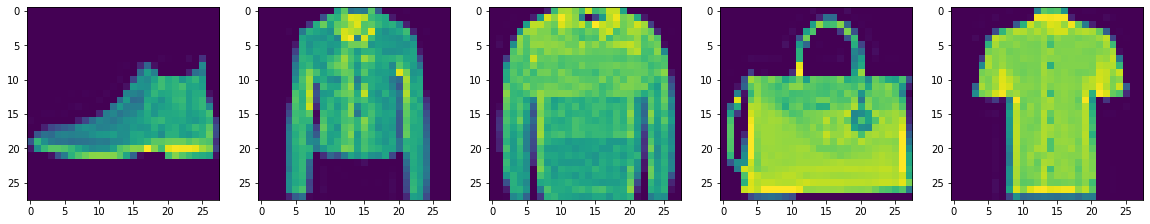

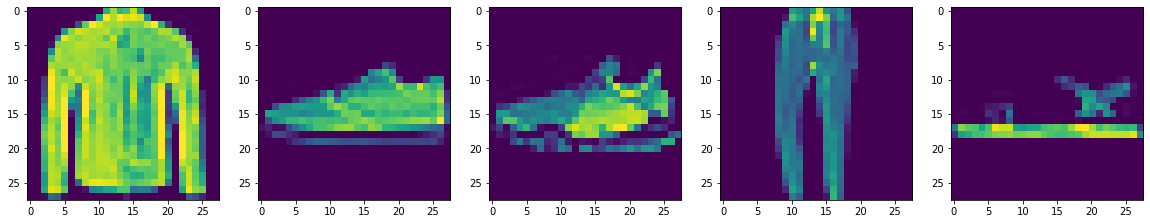

In [3]:
#Display sample input and output images (at least 10 images).
plt.figure(figsize=(20,5))
plt.subplot(151),plt.imshow(x_test[0])
plt.subplot(152),plt.imshow(x_test[10])
plt.subplot(153),plt.imshow(x_test[20])
plt.subplot(154),plt.imshow(x_test[30])
plt.subplot(155),plt.imshow(x_test[40])
plt.show()

plt.figure(figsize=(20,5))
plt.subplot(151),plt.imshow(x_test[50])
plt.subplot(152),plt.imshow(x_test[60])
plt.subplot(153),plt.imshow(x_test[70])
plt.subplot(154),plt.imshow(x_test[80])
plt.subplot(155),plt.imshow(x_test[90])
plt.show()

In [4]:
#Display the total images in the database, size of the image, no of classes in the database.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
print('Number of classes in dataset:',len(np.unique(y_test)))

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Number of classes in dataset: 10


In [5]:
#Alexnet model for feature extraction

model = Sequential()
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(28, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(28, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [6]:
#Compile Model
#Display the training accuracy / training error
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 9ms/step - loss: 1.0186 - accuracy: 0.6951
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5593 - accuracy: 0.8319
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4856 - accuracy: 0.8463
Epoch 4/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.4498 - accuracy: 0.8566
Epoch 5/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.4166 - accuracy: 0.8680
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4033 - accuracy: 0.8724
Epoch 7/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.3829 - accuracy: 0.87541s -
Epoch 8/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.3687 - accuracy: 0.8811
Epoch 9/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.3487 - accuracy: 0.8871
Epoch 10/10
1875/1875 [==============================] - 61s 

Training Accuracy is 88.89% and loss is 0.3376

In [9]:
# Classes in Fashion MNIST:
# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
# 5: Sandal
# 6: Shirt
# 7: Sneaker
# 8: Bag
# 9: Ankle boot

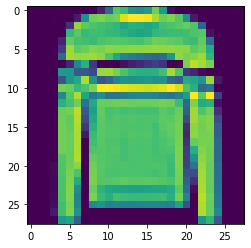

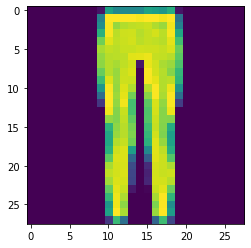

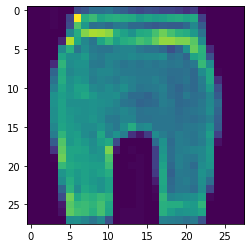

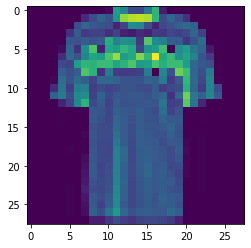

(4, 28, 28, 1)
[[6.48162386e-05 1.35623231e-05 9.99238133e-01 1.68807092e-05
  2.12254861e-04 3.33047101e-05 2.37751345e-04 1.02653059e-04
  1.96246838e-05 6.09661474e-05]
 [1.84379735e-06 9.99968052e-01 5.23918459e-07 3.45506351e-06
  2.98839768e-06 2.78808147e-06 9.80775440e-07 1.46830666e-06
  1.23471364e-05 5.66027848e-06]
 [1.10520414e-04 9.97972906e-01 1.02167112e-04 2.45149538e-04
  2.06092751e-04 9.54014758e-05 1.28676780e-04 7.50993931e-05
  1.04760111e-03 1.64325338e-05]
 [9.43396807e-01 9.21981235e-04 2.39835749e-03 7.98432622e-03
  9.59480763e-04 2.96916231e-04 4.02050391e-02 1.13666023e-03
  1.83807628e-03 8.62371409e-04]]
[2 1 1 0]


In [8]:
# A few random samples
use_samples = [5, 38, 3939, 27389]
samples_to_predict = []

# Model configuration
img_width, img_height = 28, 28

# Generate plots for samples
for sample in use_samples:
    # Generate a plot
    reshaped_image = x_train[sample].reshape((img_width, img_height))
    plt.imshow(reshaped_image)
    plt.show()
    # Add sample to array for prediction
    samples_to_predict.append(x_train[sample])

# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict.shape)

# Generate predictions for samples
predictions = model.predict(samples_to_predict)
print(predictions)

# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

In [12]:
#Display Testing Accuracy

from sklearn import metrics
y_pred = []

# Model configuration
img_width, img_height = 28, 28

y_pred = np.array(y_pred)


# Generate predictions for samples
y_pred = model.predict(x_test)
#print(predictions)
print(y_pred.shape)
# Generate arg maxes for predictions
y_pred = np.argmax(y_pred, axis = 1)

print("Accuracy: ({0:.4f})".format(metrics.accuracy_score(y_test,y_pred)))

(10000, 10)
Accuracy: (0.8722)
